In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# read the data
df = pd.read_csv('Reviews.csv')

In [ ]:
df.head()
df = df.head(10)

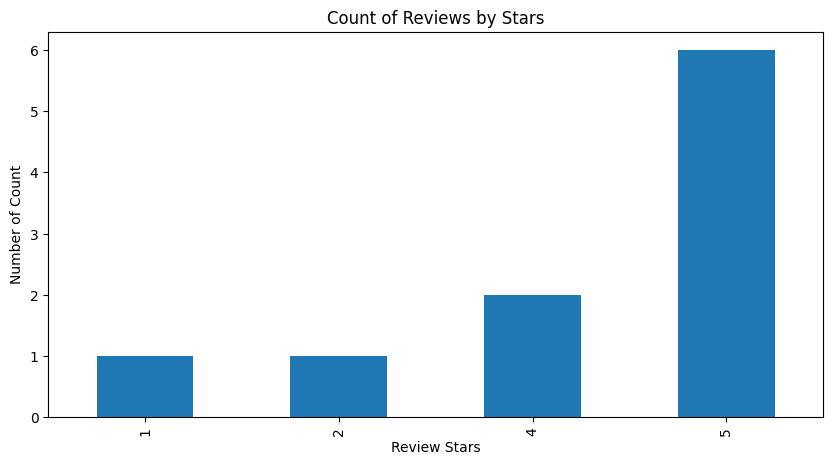

In [5]:
#apply some EDA
df.shape


ax = df['Score'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of Count')
plt.show()

In [6]:
example = df['Text'][0]
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
import nltk
nltk.download('punkt_tab')

tokens = nltk.word_tokenize(example)
tokens

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\2k22c\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 '.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 '.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most',
 '.']

In [8]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\2k22c\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [9]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\2k22c\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\2k22c\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


In [10]:
# Step 1. VADER Seniment Scoring

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\2k22c\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sid.polarity_scores("i am very happy")


{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [12]:
sid.polarity_scores("it is bad")


{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [13]:
sid.polarity_scores(df['Text'][5])

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [14]:
df['Scores'] = df['Text'].astype(str).apply(lambda Text: sid.polarity_scores(Text))
df.head()
#neg , pos , neu has its own column
df['vader_compound'] = df['Scores'].apply(lambda score_dict: score_dict['compound'])
df.head()
df['vader_neg'] = df['Scores'].apply(lambda score_dict: score_dict['neg'])
df.head()
df['vader_pos'] = df['Scores'].apply(lambda score_dict: score_dict['pos'])
df.head()
df['vader_neu'] = df['Scores'].apply(lambda score_dict: score_dict['neu'])
df.head()




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Scores,vader_compound,vader_neg,vader_pos,vader_neu
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,0.000,0.305,0.695
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,0.138,0.000,0.862
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,0.091,0.155,0.754
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,0.000,0.448,0.552


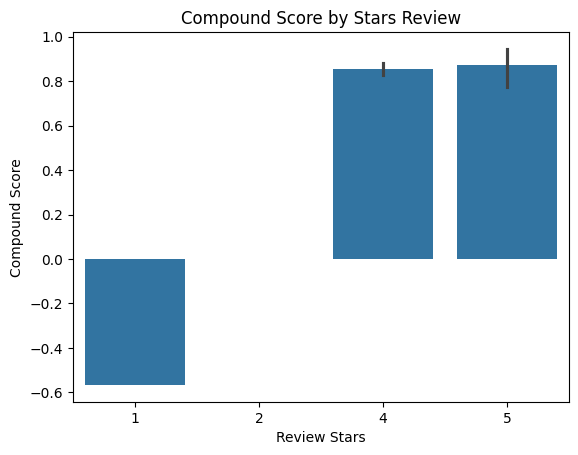

In [15]:
#create a barplot with coumpound and star of each column
ax = sns.barplot(x='Score', y='vader_compound', data=df, estimator=np.mean)
ax.set_xlabel('Review Stars')
ax.set_ylabel('Compound Score')
ax.title.set_text('Compound Score by Stars Review')
plt.show()

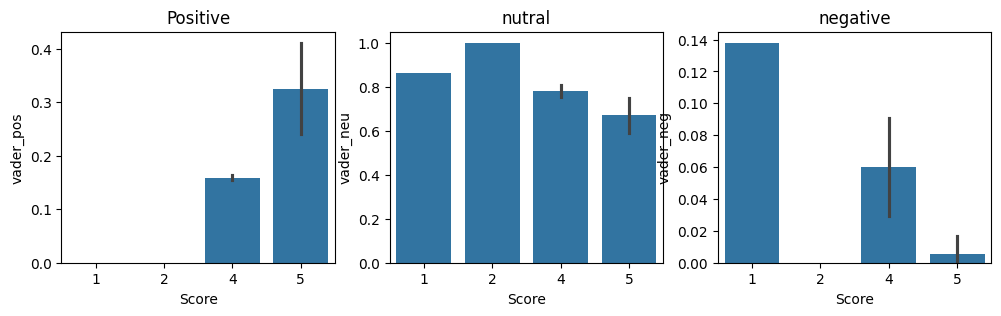

In [16]:
fig , ax = plt.subplots(1,3, figsize=(12,3))


sns.barplot(x='Score', y='vader_pos', data=df, estimator=np.mean,ax=ax[0])
sns.barplot(x='Score', y='vader_neu', data=df, estimator=np.mean,ax=ax[1])
sns.barplot(x='Score', y='vader_neg', data=df, estimator=np.mean,ax=ax[2])
ax[0].set_title('Positive')
ax[1].set_title('nutral')
ax[2].set_title('negative')
plt.show()

In [17]:
#let's start usinf another mathod of nlp which is robersta
%pip install transformers datasets torch


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
import torch

# Load pre-trained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [19]:
text = "RoBERTa is an optimized version of BERT."
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
print(inputs)


{'input_ids': tensor([[    0, 27110, 11126, 38495,    16,    41, 29854,  1732,     9,   163,
         18854,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [20]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2'}

In [21]:
output = model(**inputs)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)



{'roberta_neg': np.float32(0.032408822), 'roberta_neu': np.float32(0.81635463), 'roberta_pos': np.float32(0.15123652)}


In [28]:
#apply robersta mehod on all text column
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', padding=True, truncation=True)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

df['Robersta_Scores'] = df['Text'].astype(str).apply(lambda Text: polarity_scores_roberta(Text))
df['roberta_neg'] = df['Robersta_Scores'].apply(lambda score_dict: score_dict['roberta_neg'])
df['roberta_neu'] = df['Robersta_Scores'].apply(lambda score_dict: score_dict['roberta_neu'])
df['roberta_pos'] = df['Robersta_Scores'].apply(lambda score_dict: score_dict['roberta_pos'])


In [29]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Scores,vader_compound,vader_neg,vader_pos,vader_neu,Robersta_Scores,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.9441,0.000,0.305,0.695,"{'roberta_neg': 0.009624226, 'roberta_neu': 0....",0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.5664,0.138,0.000,0.862,"{'roberta_neg': 0.5089864, 'roberta_neu': 0.45...",0.508986,0.452413,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.8265,0.091,0.155,0.754,"{'roberta_neg': 0.0032289007, 'roberta_neu': 0...",0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,"{'roberta_neg': 0.0022951257, 'roberta_neu': 0...",0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9468,0.000,0.448,0.552,"{'roberta_neg': 0.0016347267, 'roberta_neu': 0...",0.001635,0.010302,0.988063


In [31]:
#make a pipeline for robersta model with example
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:  31%|###1      | 83.9M/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998656511306763}]

In [32]:
#make a pipeline for vander model with example
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I love you")


{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}